In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from python_analysis import *
import matplotlib.animation as animation
from numpy import random
from sklearn.linear_model import LinearRegression
from scipy.signal import argrelextrema


In [2]:
# impose dimensions of figures and font

plt.rcParams["figure.figsize"] = (25,15)
plt.rcParams.update({'font.size': 23})

# MOL for (1+1) dimensional system of equation

In [3]:
names = []

# we need informations to find the files:

# amplitudes vetor, contains the amplitudes of the file we want to analyze
#"-2.313328", "-2.316648", "-2.319366", "-2.321592", "-2.323414", "-2.324906", "-2.326127", "-2.327127", "-2.327946", "-2.328616", "-2.329165", "-2.329614", "-2.329982", "-2.330283", "-2.330530", "-2.330732", "-2.330897", "-2.331032", "-2.331143", "-2.331234",
amplitude_vector =  ["-2.328616"]#, "-2.329165", "-2.329614", "-2.329982", "-2.330283", "-2.330530"];

# time
range_time = 0.8
number_steps= 200
len_step = range_time / number_steps
times = np.arange(0,range_time+len_step/2,len_step)

epsilon = ["0.000000"]
dx = "0.005000"

number_of_proc = 4

model = "model3"
data = [0]
for i in data:
    for e in range(len(epsilon)):
        for a in range(len(amplitude_vector)):
            for n in range(number_of_proc):
                names.append("./data/"+model+"/data"+str(i)+"/processor_"+str(n)+"_ampl_"+amplitude_vector[a]+
                             "_eps"+epsilon[e]+"_dx_"+dx+"steps"+str(number_steps)+"last_time"+str(format(range_time, '.6f'))+".csv") 
len(names)
#-2.313328 -2.316648 -2.319366 -2.321592 -2.323414 -2.324906 -2.326127 -2.327127 -2.327946 -2.328616 -2.329165 -2.329614 -2.329982 -2.330283 -2.330530 -2.330732 -2.330897 -2.331032 -2.331143

4

In [4]:
print(len(names))

4


In [5]:
print(names[0])

./data/model3/data0/processor_0_ampl_-2.328616_eps0.000000_dx_0.005000steps200last_time0.800000.csv


In [12]:
big_DF = []

In [13]:
%%time
h1 = float(dx)
h2 = h1/2
h3 = h2/2
domain_lenght = 5
dmin = 0
dmax = 5
gl = 2
gr = 2
for p in range(int(len(names)/4)):
    print("----->",p)
    big_DF=big_DF+read_parallel_data(dmax,dmin,gl,gr,domain_lenght,h1,h2,h3,number_of_proc,number_steps,names[p*4:p*4+4])

-----> 0
[1005, 2005, 4005]
249 252 255
run:0 ->./data/model3/data0/processor_0_ampl_-2.328616_eps0.000000_dx_0.005000steps200last_time0.800000.csv added
number of runs: 4
CPU times: user 16.2 s, sys: 961 ms, total: 17.2 s
Wall time: 15.8 s


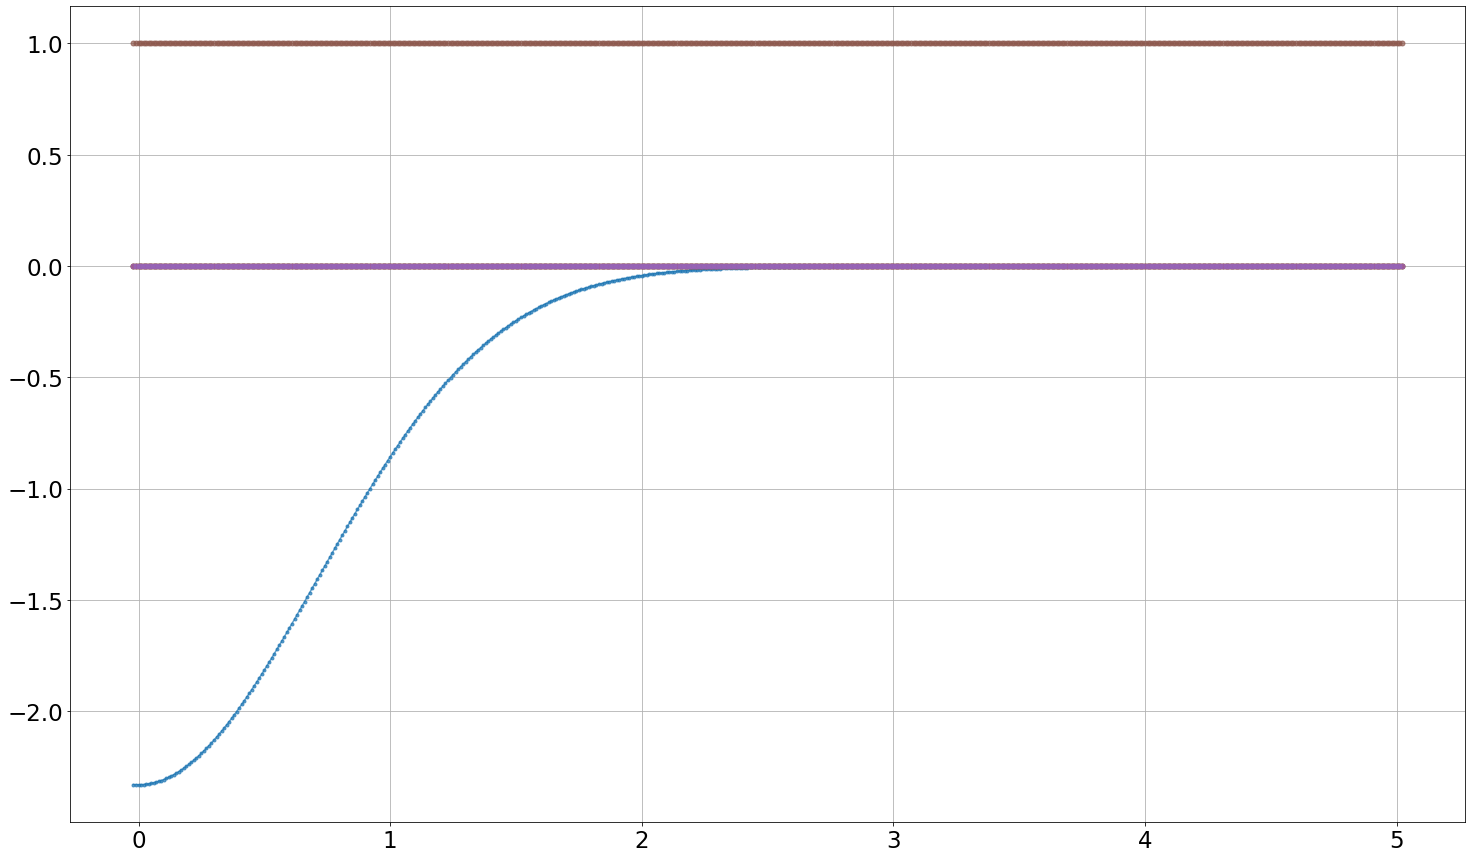

In [534]:
for n in range(0,1):
    for i in range(0,1):
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field0'],'.-',alpha=0.7,label="field 0")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field1'],'.-',alpha=0.7,markersize=5,label="field 1")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field2'],'.',alpha=0.7,markersize=10,label="field 2")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field3'],'.',alpha=0.7,markersize=10,label="field 2")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field4'],'.',alpha=0.7,markersize=10,label="field 2")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field5'],'.',alpha=0.7,markersize=10,label="field 2")


#plt.legend()
plt.grid()
#plt.xlim([-1, 5.5])
#plt.ylim([-10, 1])

In [448]:
def hyperbolic_chi_we_solution(r,t,a,ds,s):
    return((a*(r-t)*np.exp(-1*ds**2*(r-t)**2)+a*(-r+t+2*r/(1-r**2/s**2))*np.exp(-1*ds**2*(-r+t+2*r/(1-r**2/s**2))**2 ))*(1+r**2/(1-r**2/s**2)**2)**0.5*(1-r**2/s**2)/2/r)
def spherical_we_solution(r,t,a,ds):
    return( (a*(r-t)*np.exp(-(ds*(r-t))**2)+a*(r+t)*np.exp(-(ds*(r+t))**2))/2/r )
def initial_test(r,t,a,ds,s):
    return(a*(1+r**2/(1-r**2/s**2)**2)**0.5*np.exp(-ds**2*(r/(1-r**2/s**2))**2))

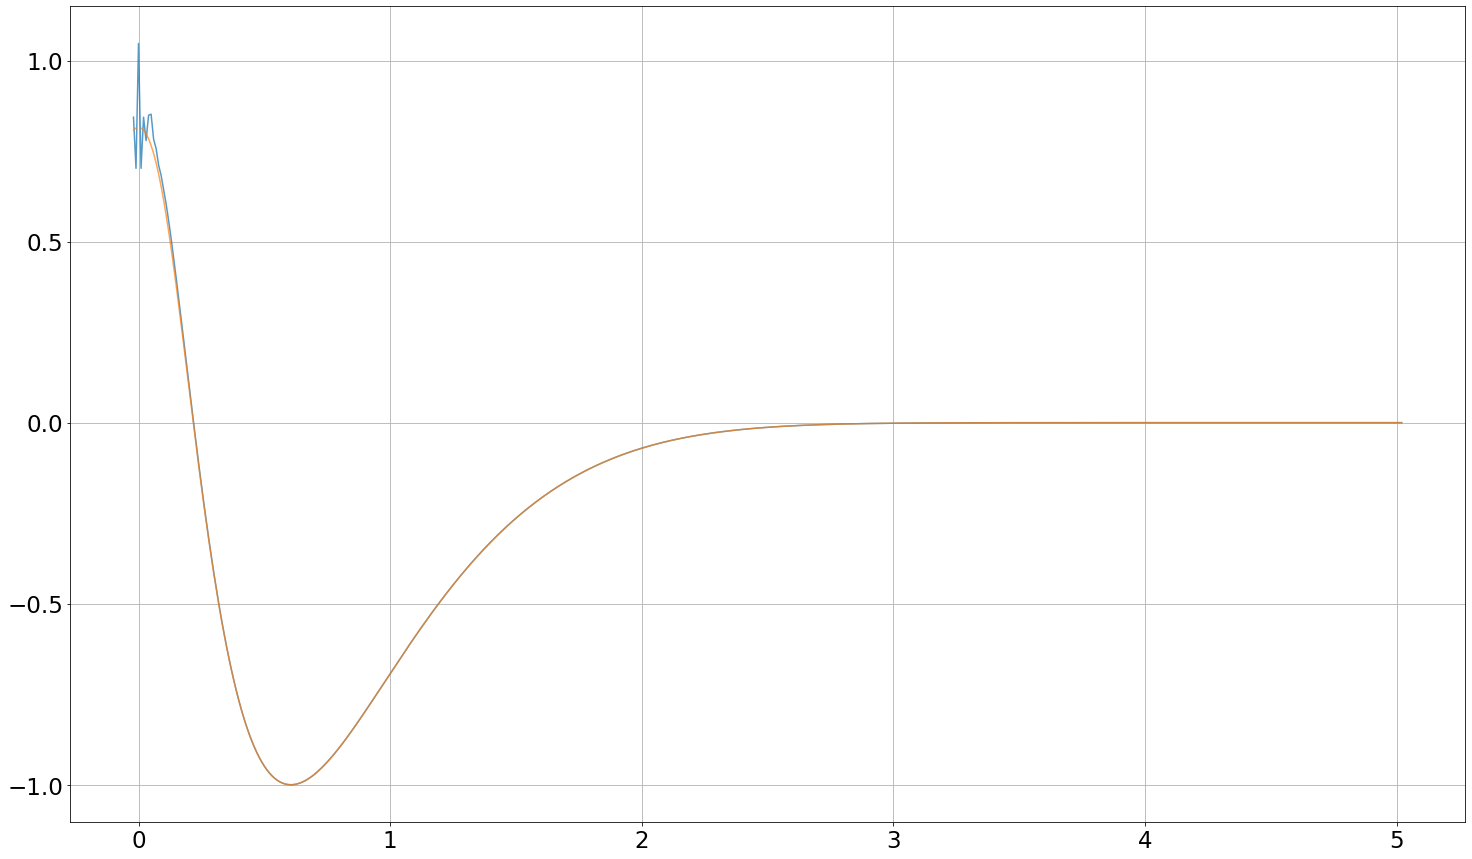

In [568]:
for n in [0]:
    for i in range(0,1):        
        for j in range(199,200):
            #plt.plot(X[j],big_DF[n][i][j]['field0'],alpha=0.6,markersize=15,label="time:"+str(times[j])+"e:"+amplitude_vector[n])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field0'],alpha=0.8,markersize=8,label=times[j])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field1'],alpha=0.5,markersize=8,label=times[j])
            plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field2'],alpha=0.75,markersize=5,label="2")
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field3'],alpha=0.8,markersize=8,label=times[j])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field4'],alpha=0.8,markersize=8,label=times[j])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field5'],alpha=0.8,markersize=8,label="5")
            plt.plot(big_DF[n][i][j]['x'],model3_gaussian_solution(big_DF[n][i][j]['x'],times[j],float(amplitude_vector[0])),markersize=5,alpha=0.7,label="teo,time:"+str(times[j]))
            #plt.plot(big_DF[n][i][j]['x'],spherical_we_solution(big_DF[n][i][j]['x'],times[j],1,1))
            #plt.plot(big_DF[n][i][j]['x'],hyperbolic_chi_we_solution(big_DF[n][i][j]['x'],times[j],1,1/5,5),'.-',alpha=0.5,label='theoretical')
            #plt.plot(big_DF[n][i][j]['x'],initial_test(big_DF[n][i][j]['x'],times[j],1,1./5.,5))
            
plt.grid()
#plt.xlim([-5.5,-4])
#plt.ylim([ 0.08,0.1] )
#plt.yscale('log')
#plt.legend()


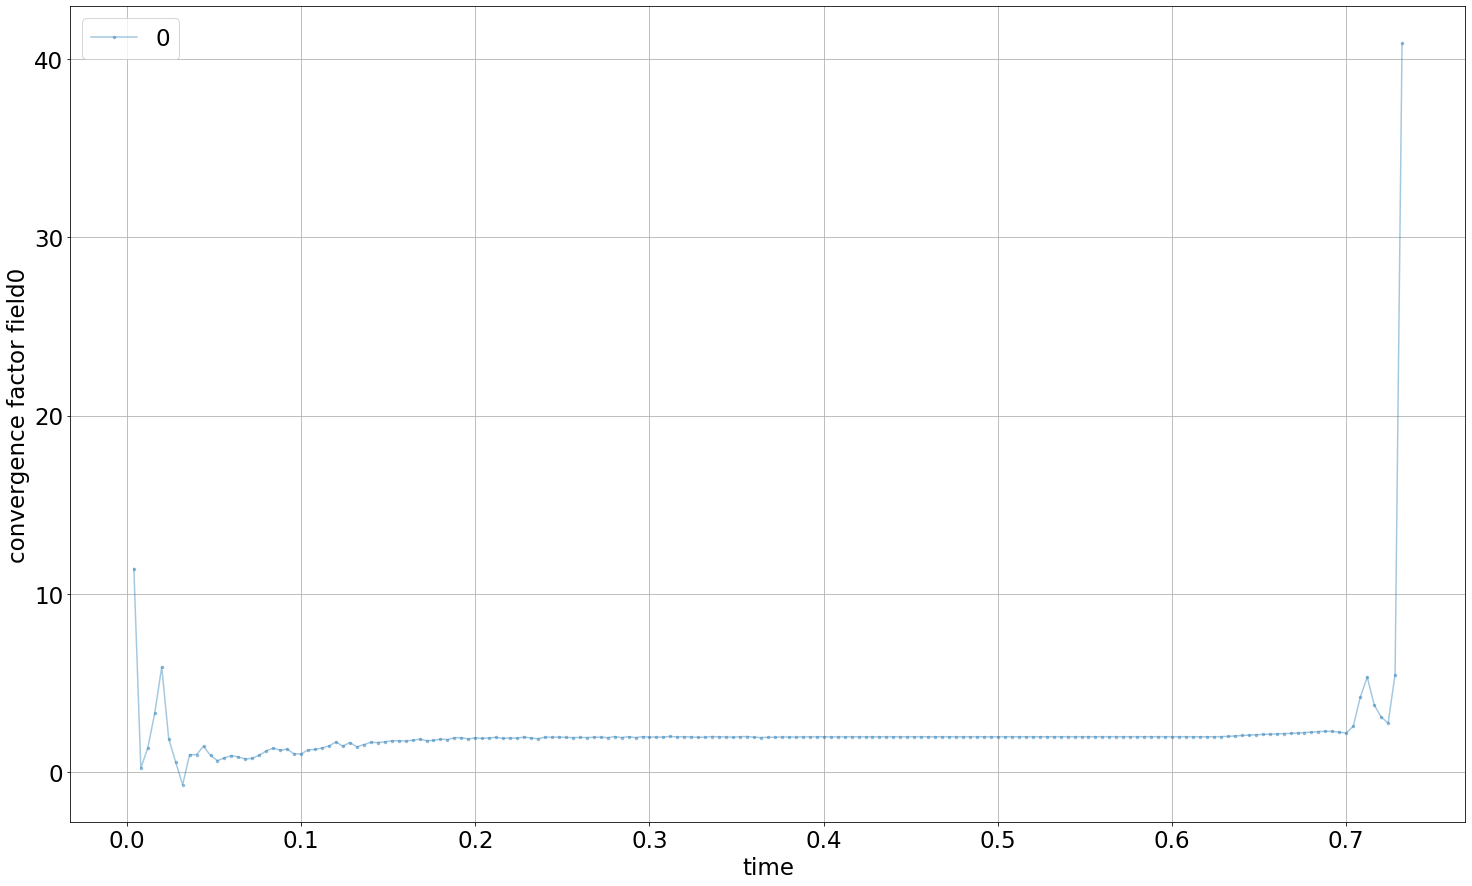

In [496]:
allruns_self_conv_test_vect = []
self_conv_test_vect = []
"""
for i,t in enumerate(times[::2]):
        self_conv_test_vect.append(self_conv_test(big_DF[0][0][i],big_DF[0][1][i],big_DF[0][2][i]))
        allruns_self_conv_test_vect.append(self_conv_test_vect)
#plt.plot(times[::2], self_conv_test_vect,markersize=10,alpha=0.5,label=label_vector[0])
"""
field = "field0"

for n in [0]:
    self_conv_test_vect = []
    for i,t in enumerate(times[0:-1]):
        self_conv_test_vect.append( self_conv_test_spherical(big_DF[n][0][i],big_DF[n][1][i],big_DF[n][2][i],gl,gr,field) )
        
    allruns_self_conv_test_vect.append(self_conv_test_vect)
    plt.plot(times[0:-1], self_conv_test_vect,'.-',markersize=5,alpha=0.4,label=n)
#plt.xlim(0,30)
#plt.ylim(1.5,2.5)
plt.xlabel('time')
plt.ylabel('convergence factor '+ field)
plt.xlabel('time')
#plt.vlines(0.652,0,5,alpha=0.5,label="time = 9.4")
#plt.hlines(2,0,12,alpha=0.5,label="time = 9.4")

plt.grid()
plt.legend()

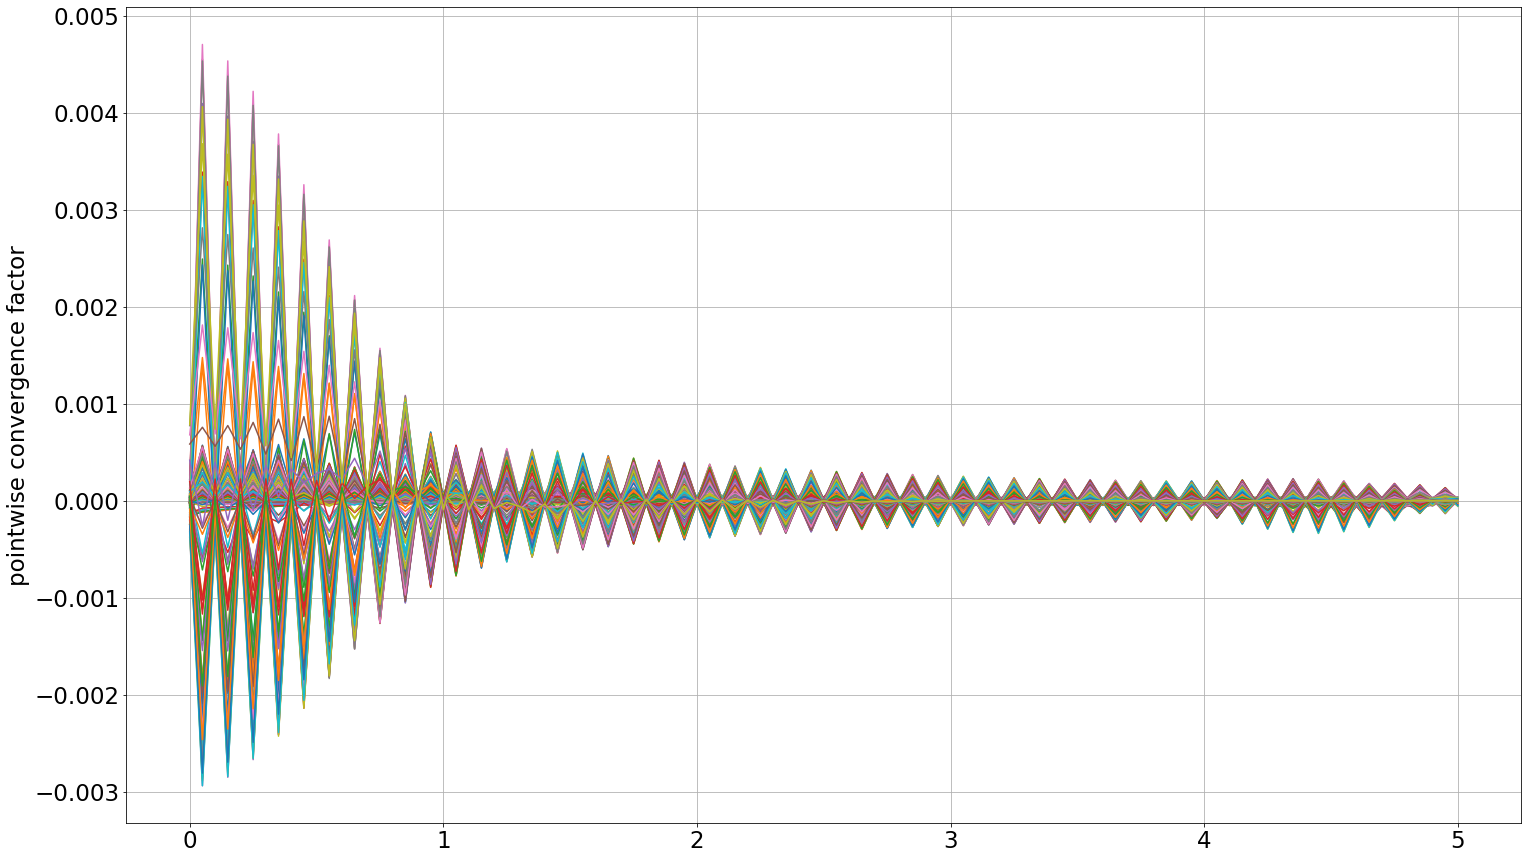

In [419]:
n_ind = 0
field = "field0"
self_conv_test_vect_pw = []
for j in range(0,number_steps-1):
    self_conv_test_vect_pw.append(self_conv_test_pw(big_DF[n_ind][0][j], big_DF[n_ind][1][j], big_DF[n_ind][2][j],gl,gr,field))
    plt.plot(big_DF[n_ind][0][0]['x'][gl:-gr],self_conv_test_vect_pw[j][0]-self_conv_test_vect_pw[j][1],markersize=15)
    #plt.hlines(np.mean(self_conv_test_vect_pw[j]),-5,5,alpha=0.4)

#plt.plot(times,self_conv_test_vect_pw,label="conv_test")
#plt.xlim(-3.5,-3.7)
#plt.ylim(1.95,2.1)
#plt.xlabel('time')
plt.ylabel('pointwise convergence factor')
plt.grid()
#plt.legend()
#print(self_conv_test_vect_pw[-24])

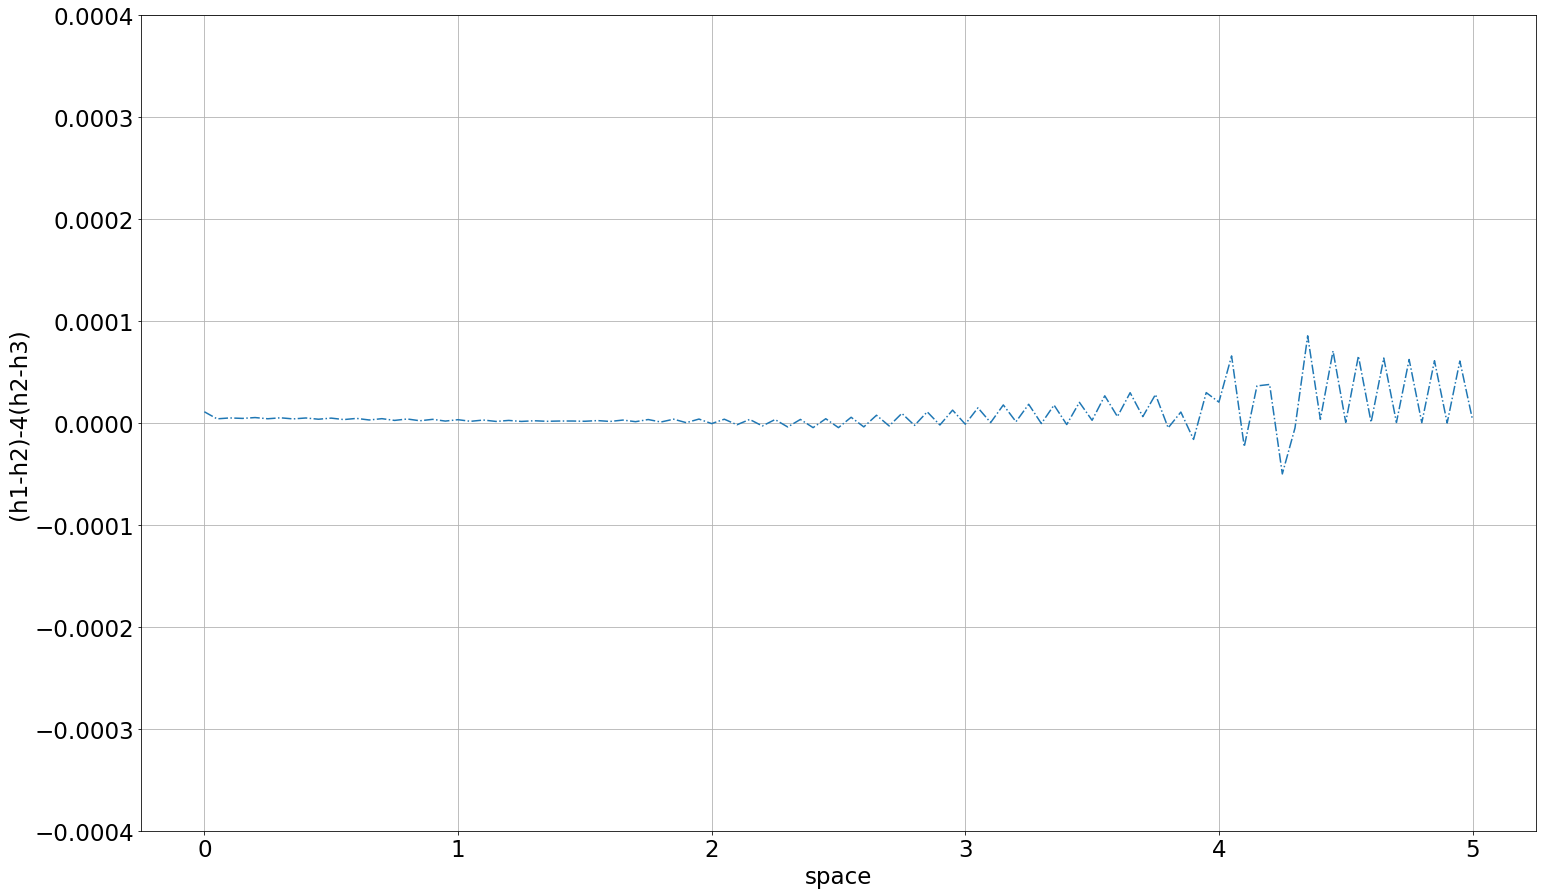

In [371]:
fig, ax = plt.subplots()

line1, = ax.plot(big_DF[n_ind][0][1]['x'][gl:-gr], self_conv_test_vect_pw[1][0]-self_conv_test_vect_pw[1][1],'-.')
#line2, = ax.plot(DF[0][1]['x'], self_conv_test_vect_pw[1][1],'.')
plt.grid()
plt.ylim(-0.0004,0.0004)
plt.xlabel('space')
plt.ylabel('(h1-h2)-4(h2-h3)')

def animate1(i):
    line1.set_ydata(self_conv_test_vect_pw[i][0]-self_conv_test_vect_pw[i][1])  # update the data.
    return line1,

#def animate2(i):
#    line2.set_ydata(self_conv_test_vect_pw[i][0])  # update the data.
#    return line2,


ani = animation.FuncAnimation(
    fig, animate1, interval=80, blit=True, frames=number_steps-1)
ani.save("pw_conv.mp4")



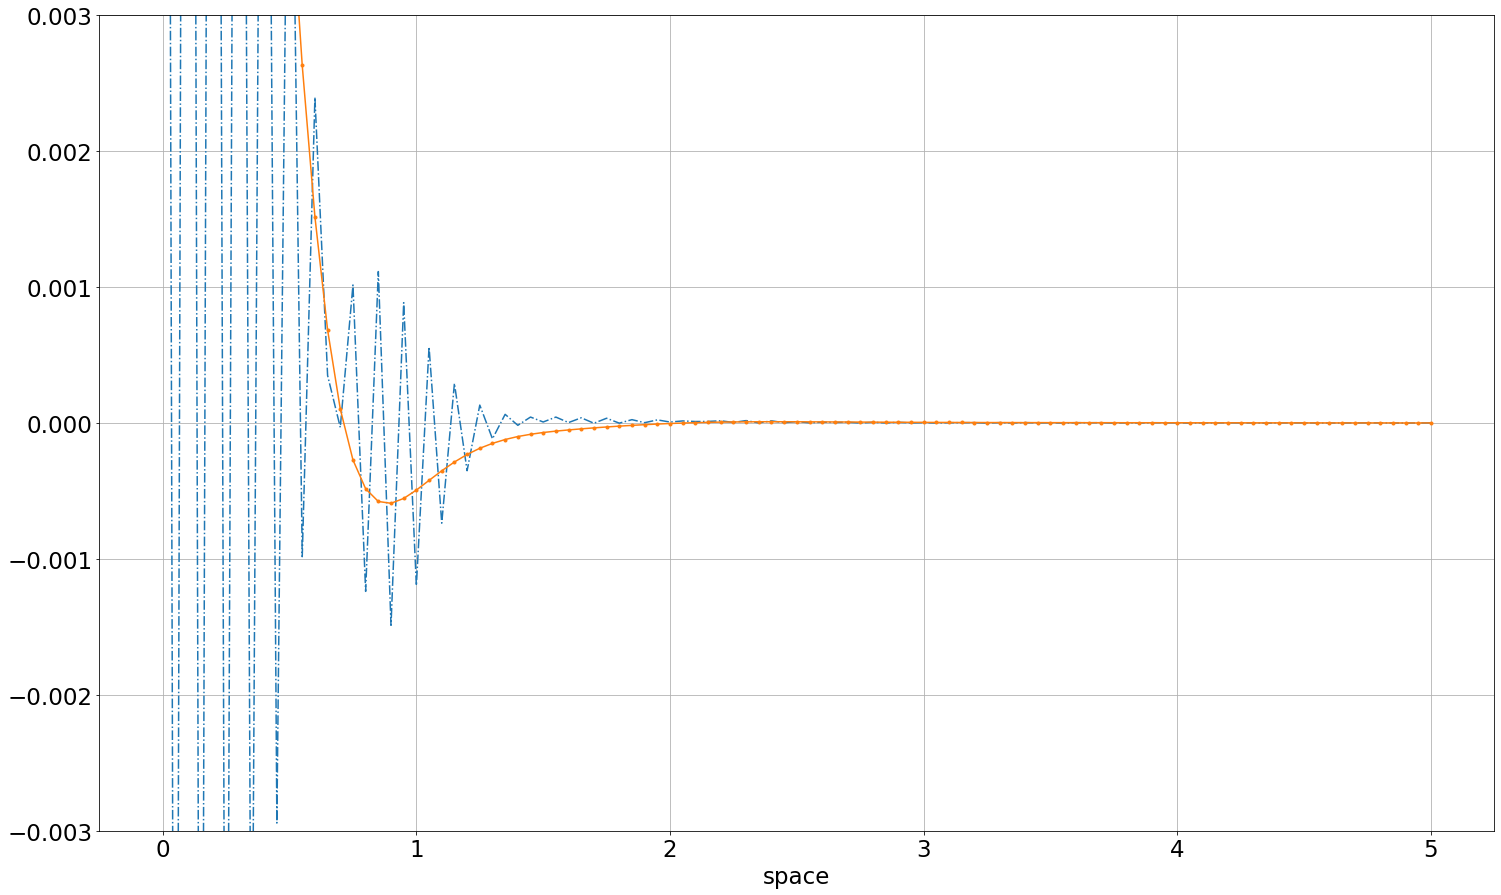

In [22]:
fig, ax = plt.subplots()

line1, = ax.plot(big_DF[n_ind][0][1]['x'][gl:-gr], self_conv_test_vect_pw[1][0],'-.')
line2, = ax.plot(big_DF[n_ind][0][1]['x'][gl:-gr], self_conv_test_vect_pw[1][1],'.-')
plt.grid()
plt.ylim(-0.003,0.003)
plt.xlabel('space')
#plt.ylabel('(h1-h2)-4(h2-h3)')
data_name = "./data/"+model+"/data"+str(data[0])+"/"+field+"_epsilon"+str(epsilon[n_ind])+"dx"+dx+"_pointwise_convergence.mp4"

def animate1(i):
    line1.set_ydata(self_conv_test_vect_pw[i][0])  # update the data.
    line2.set_ydata(self_conv_test_vect_pw[i][1])
    return line1,line2

#def animate2(i):
 #   line2.set_ydata(self_conv_test_vect_pw[i][1])  # update the data.
  #  return line2,


ani = animation.FuncAnimation(
    fig, animate1, interval=80, blit=True, frames=number_steps-1)
ani.save(data_name)



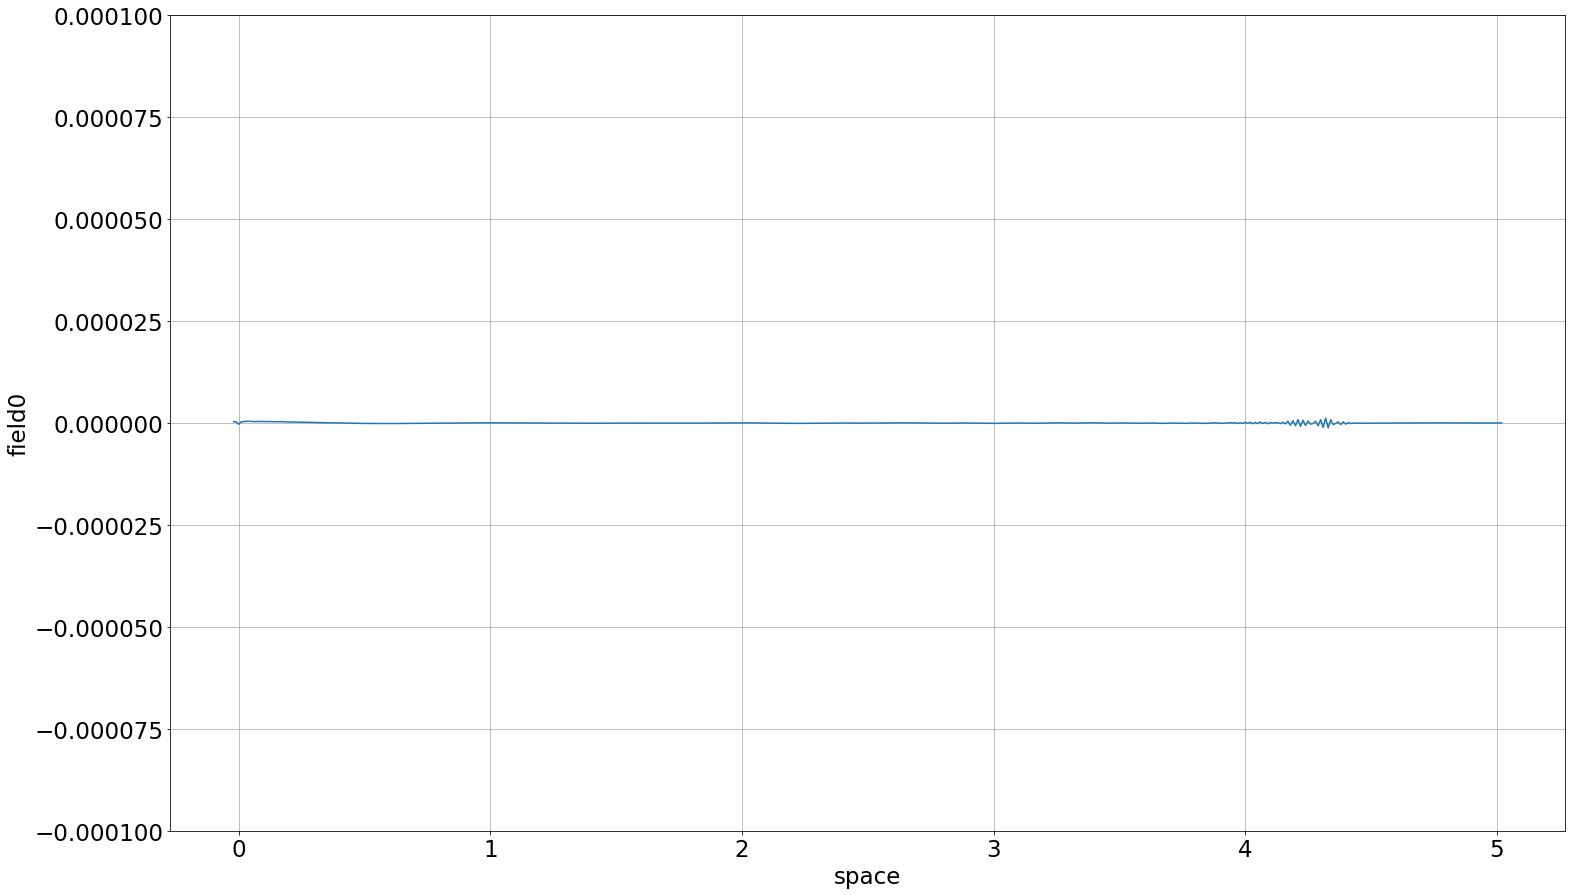

In [653]:
fig, ax = plt.subplots()
field = 0
h_ind = 0
big_DF_ind = 0
data_name = "./data/"+model+"/data"+str(data[0])+"/field"+str(field)+".mp4"
line, = ax.plot(big_DF[big_DF_ind][h_ind][0]['x'], big_DF[big_DF_ind][h_ind][0]['field'+str(field)])
plt.ylim(-0.0001,0.0001)
plt.xlabel('space')
plt.ylabel('field'+str(field))
#plt.xlim(-5,0)
plt.grid()

def animate(i):
    #line.set_xdata(DF[0][i]['x'])
    line.set_ydata(big_DF[big_DF_ind][h_ind][i]['field'+str(field)])  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=50, blit=True, save_count=number_steps-1)
ani.save(data_name)



In [146]:
print(data_name)

./data/wave_equation/data43/field0.mp4


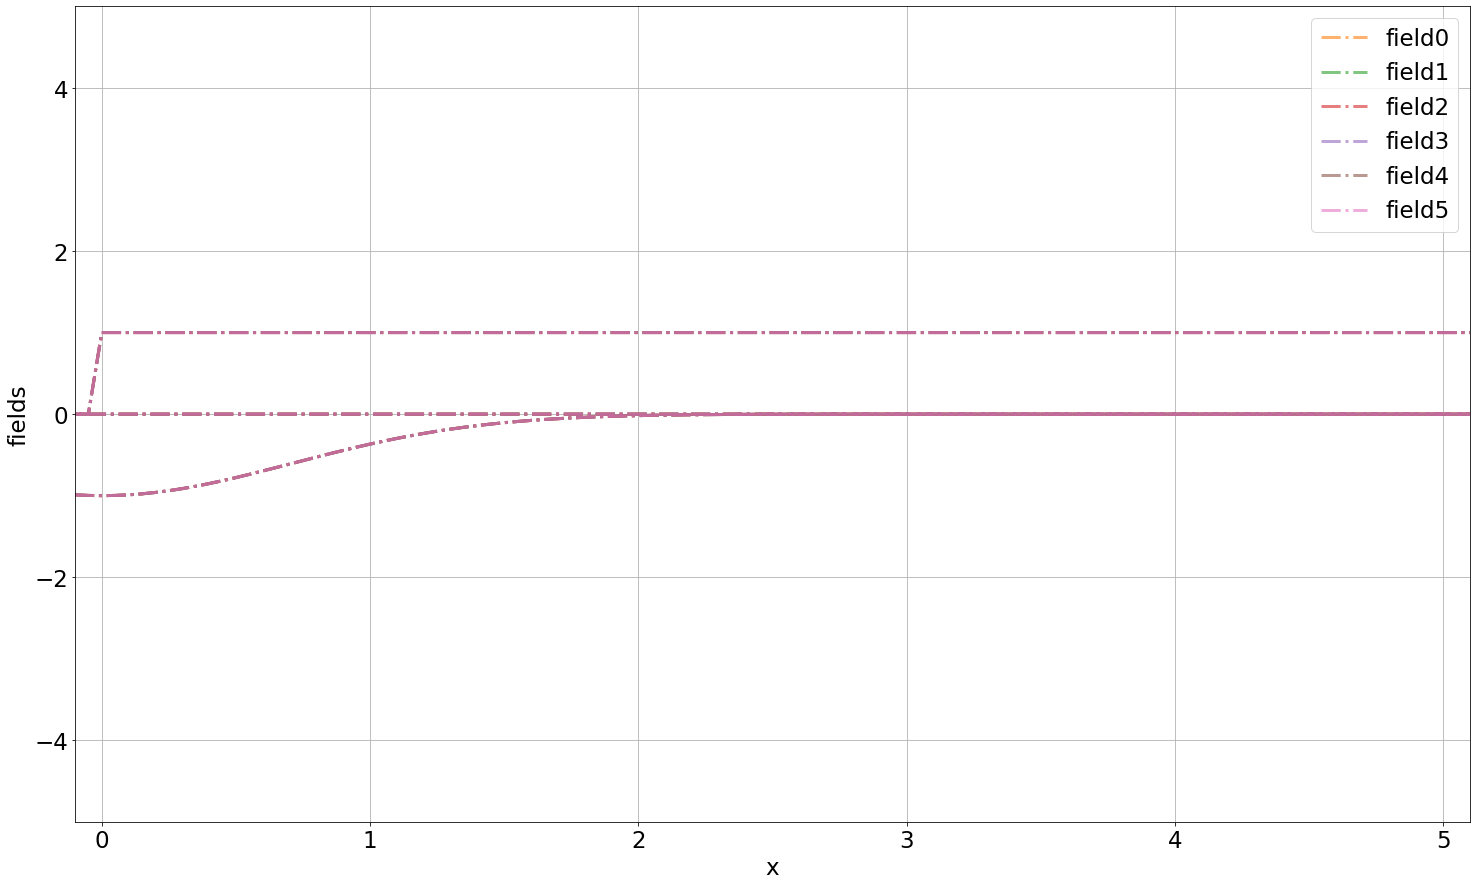

In [405]:
fields_to_print = ["field0","field1","field2","field3","field4","field5"]
h_ind = 0
big_DF_ind = 0
data_name = "./data/"+model+"/data"+str(data[0])+"/fields.mp4"
fig = plt.figure()
ax1 = plt.axes(ylim=(-5,5),xlim=(-float(dx)*gl,domain_lenght+float(dx)*gr))
line, = ax1.plot([], [])
plt.xlabel('x')
plt.ylabel('fields')
plotlays = [fields_to_print]
lines = []
for index in (fields_to_print):
    lobj = ax1.plot([],[],'-.',lw=3,alpha=0.6,label=index)[0]
    lines.append(lobj)

x = []
y = []
for i in (fields_to_print):
    x.append([big_DF[0][h_ind][0]['x']]),
    y.append([ big_DF[0][h_ind][0][i]])


def init():
    for line in lines:
        line.set_data(x,y)      
        #line.set_data([x1,x2,x3,x4,x5,x6,x7],[y1,y2,y3,y4,y5,y6,y7])
    return lines





def animate(i):
    for n,j in enumerate (fields_to_print):
        x[n] = big_DF[big_DF_ind][h_ind][0]['x']
        y[n] = big_DF[big_DF_ind][h_ind][i][j]
        
    

    xlist = x
    ylist = y

    #for index in range(0,1):
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 

    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(number_steps-1), interval=75, blit=True)
plt.legend()
plt.grid()
plt.show()
anim.save(data_name)

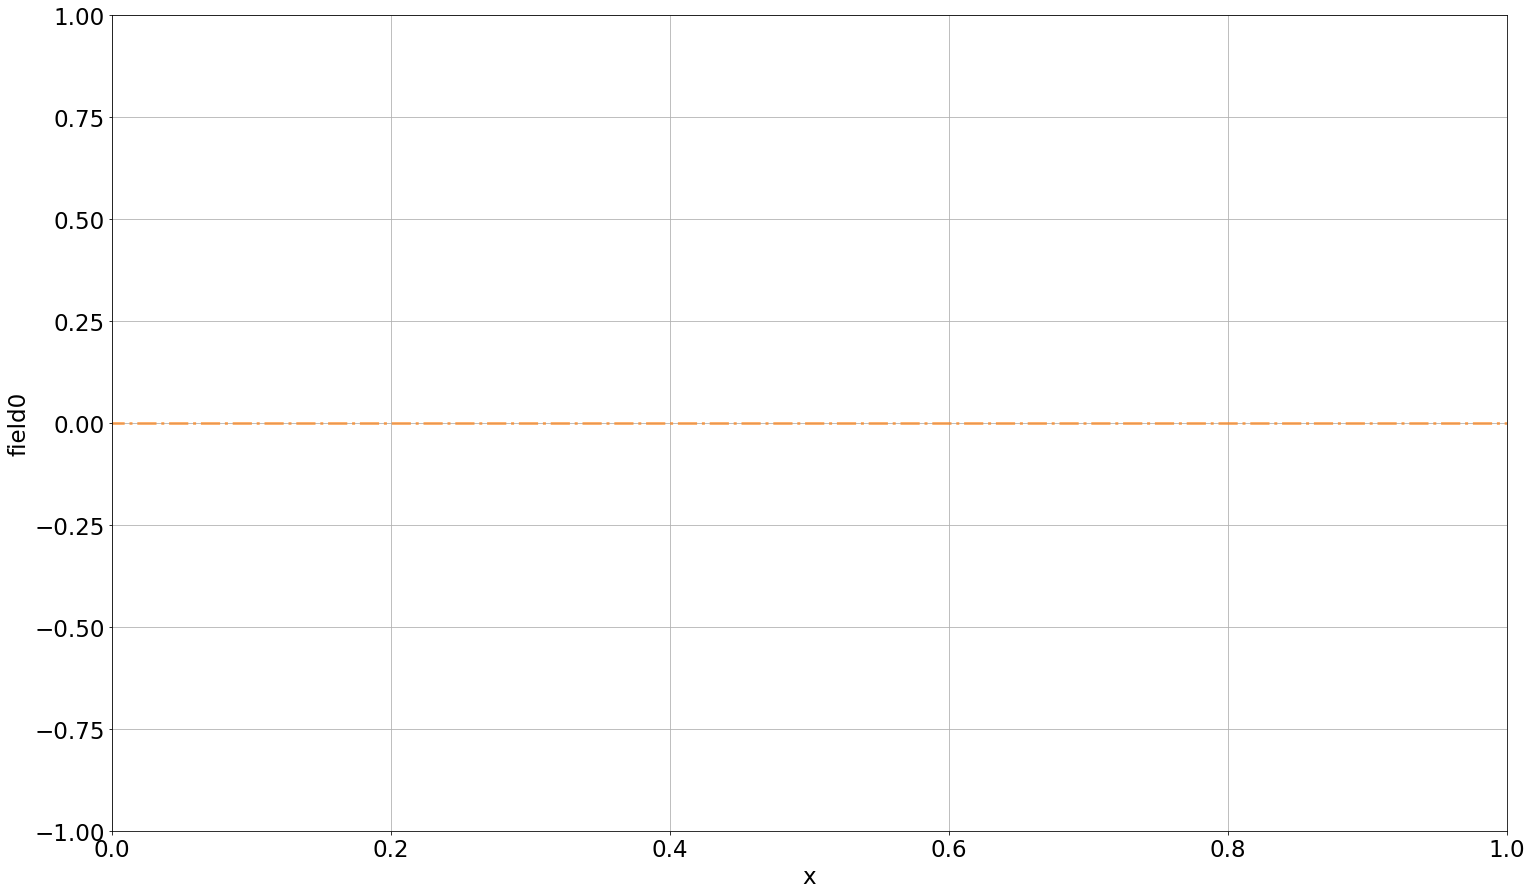

In [17]:
fields_to_print = [0]
h_ind = 2
data_name = "./data/"+model+"/data"+str(data[0])+"/fields.mp4"
fig = plt.figure()
ax1 = plt.axes(ylim=(-1,1),xlim=(0,domain_lenght))
line, = ax1.plot([], [])
plt.xlabel('x')
plt.ylabel('field0')
plotlays = [fields_to_print]
lines = []
for index in (fields_to_print):
    lobj = ax1.plot([],[],'-.',lw=3,alpha=0.6)[0]
    lines.append(lobj)

x = []
y = []
for i in (fields_to_print):
    x.append([big_DF[0][h_ind][0]['x']]),
    y.append([ big_DF[0][h_ind][0]['field0']])


def init():
    for line in lines:
        line.set_data(x,y)      
        #line.set_data([x1,x2,x3,x4,x5,x6,x7],[y1,y2,y3,y4,y5,y6,y7])
    return lines





def animate(i):
    for n,j in enumerate (fields_to_print):
        x[n] = big_DF[j][h_ind][0]['x']
        y[n] = big_DF[j][h_ind][i]['field0']
        
    

    xlist = x
    ylist = y

    #for index in range(0,1):
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 

    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=number_steps-1, interval=50, blit=True)

plt.grid()
plt.show()
anim.save(data_name)

In [573]:
maximums = runs_maximums_vector(big_DF,2,'field0')
amplitudes_vector = []
for n in range(int(len(names)/4)):
    amplitudes_vector.append(float(names[4*n][38:46]))
print('amplitudes:',amplitudes_vector)
for i in range(len(amplitudes_vector)):
    amplitudes_vector[i] = 2.3316439816- amplitudes_vector[i]
amplitudes_for_fit = -np.log(amplitudes_vector[:]).reshape((-1, 1))
line_model = LinearRegression()
print(len(amplitudes_for_fit))
line_model.fit(amplitudes_for_fit,np.log(maximums))
print("maximum",maximums)
print('intercept:',line_model.intercept_,'angular coefficient', line_model.coef_)

amplitudes: [2.328616, 2.329165, 2.329614, 2.329982, 2.330283, 2.33053]
6
maximum [38.6043, 43.7242, 48.4625, 52.7406, 56.5029, 59.7526]
intercept: 1.1657617831726457 angular coefficient [0.43407358]


Text(0, 0.5, 'maximum PI overall times')

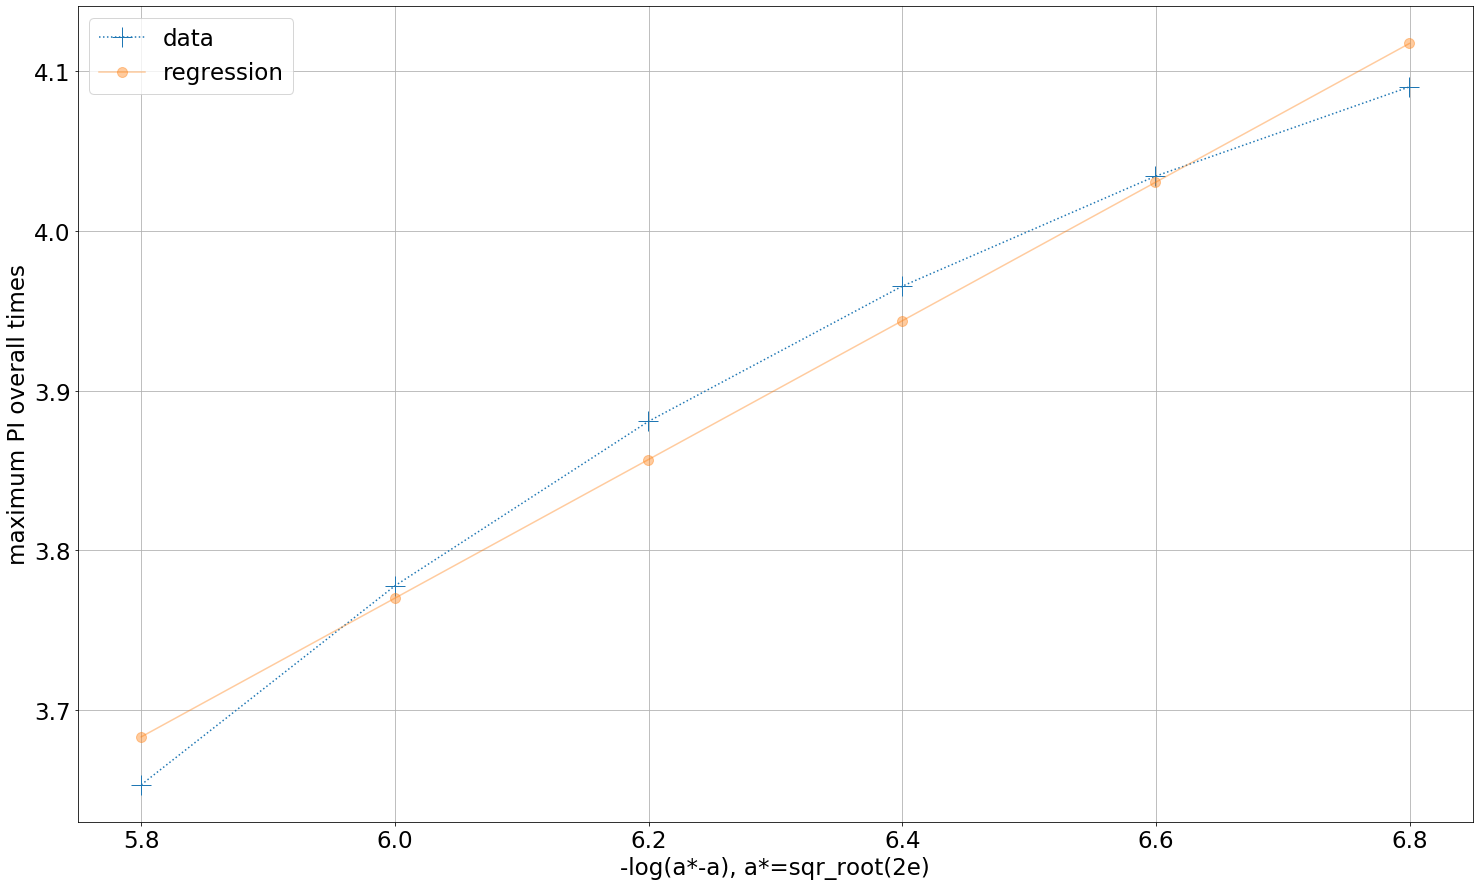

In [574]:
plt.plot(-np.log(amplitudes_vector),np.log(maximums),'+:',markersize=20,alpha=1,label='data')
plt.plot(-np.log(amplitudes_vector),line_model.predict(-np.log(amplitudes_vector).reshape(-1,1)),'.-',markersize=20,alpha=0.4,label='regression')
plt.grid()
plt.legend()
plt.xlabel('-log(a*-a), a*=sqr_root(2e)')
plt.ylabel('maximum PI overall times')
#RESULTS: intercept: 0.796531249552912 angular coefficient [0.49825299]

In [50]:
amplitudes_vector_creator(4,8,2.3316439816,0.2)
#"-2.313328", "-2.316648" , "-2.319366", "-2.321592", "-2.323414","-2.324906", "-2.326127", "-2.327127" , "-2.327946", "-2.328616","-2.329165", "-2.329614", "-2.329982", "-2.330283", "-2.330530"

array([2.31332834, 2.3166484 , 2.31936664, 2.32159215, 2.32341423,
       2.32490603, 2.32612742, 2.3271274 , 2.32794612, 2.32861643,
       2.32916523, 2.32961455, 2.32998242, 2.33028361, 2.33053021,
       2.3307321 , 2.3308974 , 2.33103273, 2.33114353, 2.33123425])

In [14]:
 2.327946 needs 0.05,  2.330732 needs 0.0025

9.326575926388497

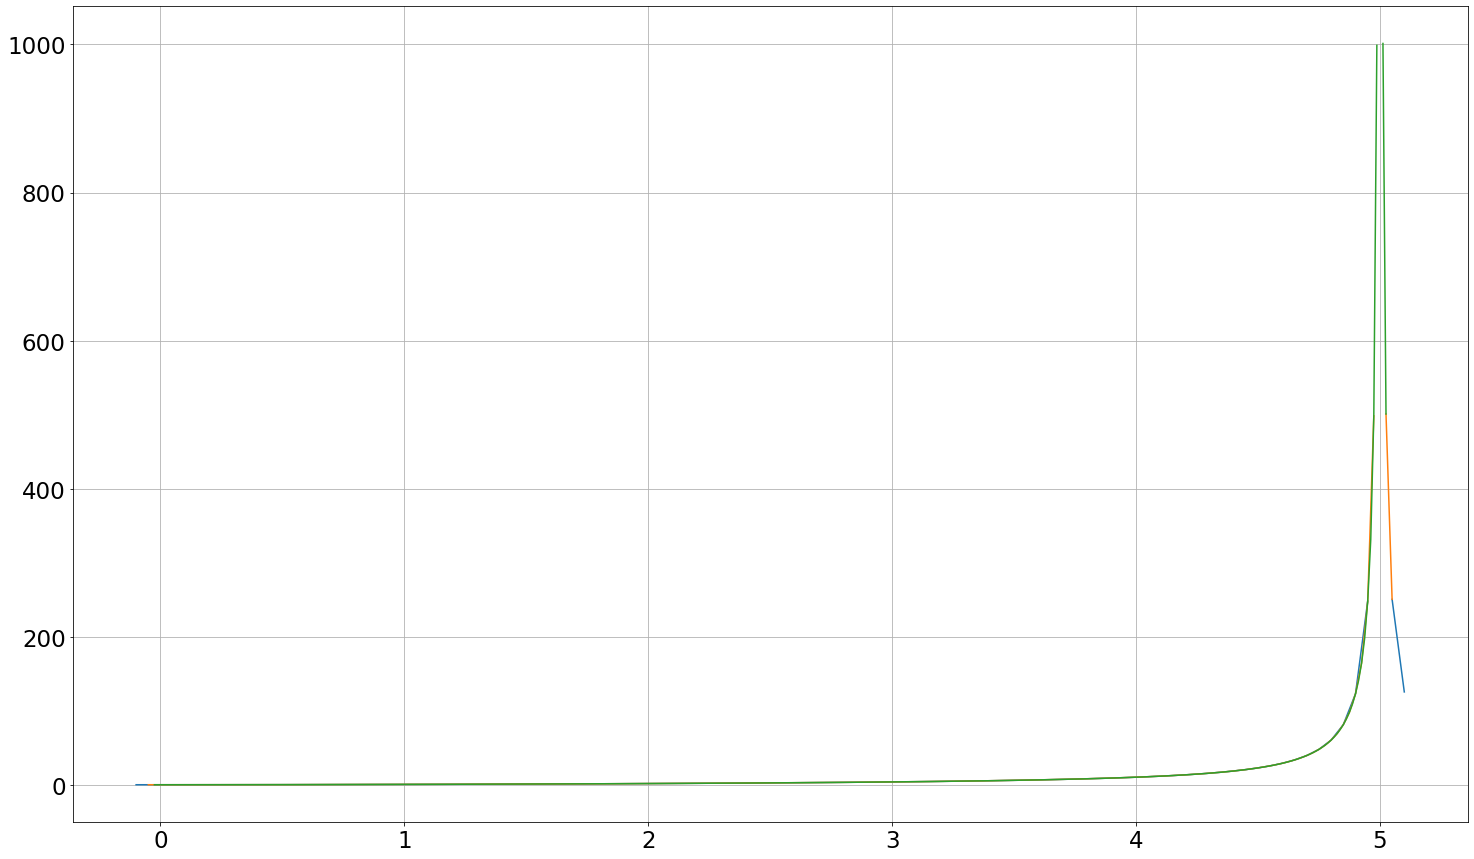

In [120]:
s = 5
for n in [0]:
    Chi = []
    for i in range(0,3): 
            r = big_DF[n][i][0]['x']
            R = r/(1-r**2/s**2)
            Chi.append(np.sqrt(1+R**2))
            plt.plot(big_DF[n][i][0]['x'],Chi[i])
plt.grid()


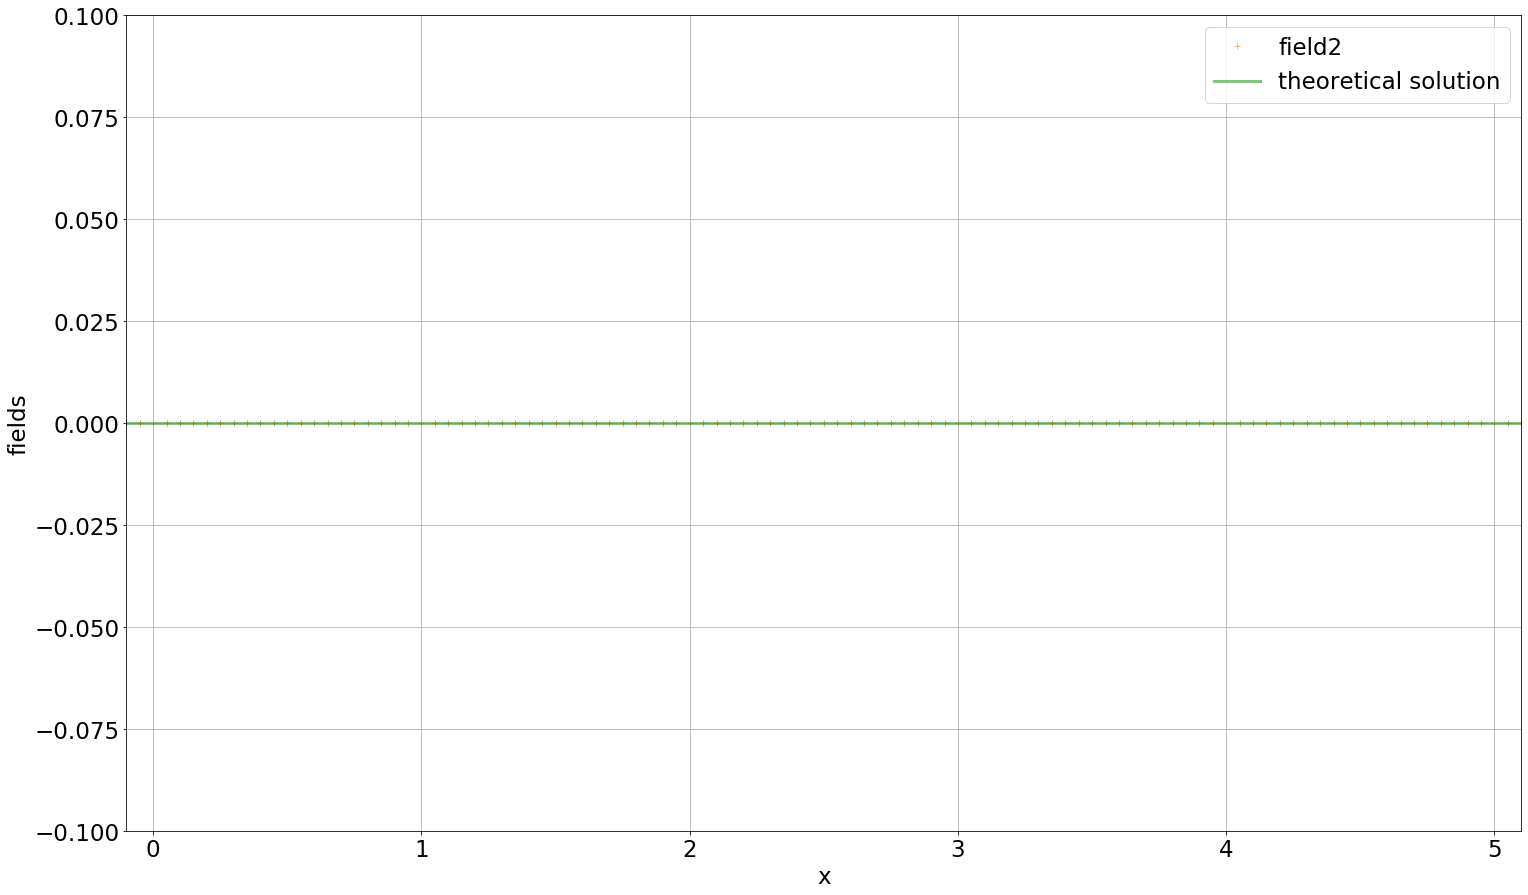

In [407]:
fields_to_print = ["field2","theoretical"]
h_ind = 0
big_DF_ind = 0
data_name = "./data/"+model+"/data"+str(data[0])+"/theoretical_comparison.mp4"
fig = plt.figure()
ax1 = plt.axes(ylim=(-0.1,0.1),xlim=(-float(dx)*gl,domain_lenght+float(dx)*gr))
line, = ax1.plot([], [])
plt.xlabel('x')
plt.ylabel('fields')
plotlays = [fields_to_print]
lines = []
for index in (fields_to_print[0:-1]):
    lobj = ax1.plot([],[],'+',lw=3,alpha=0.6,label=index)[0]
    lines.append(lobj)
lobj = ax1.plot([],[],lw=3,alpha=0.6,label="theoretical solution")[0]
lines.append(lobj)
    
x = []
y = []
for i in (fields_to_print[0:-1]):
    x.append([big_DF[big_DF_ind][h_ind][0]['x']]),
    y.append([ big_DF[big_DF_ind][h_ind][0][i]])
    
x.append([big_DF[0][h_ind][0]['x']]),
y.append([model3_gaussian_solution(big_DF[big_DF_ind][h_ind][0]['x'],times[0],float(amplitude_vector[big_DF_ind]))])
#y.append([hyperbolic_chi_we_solution(big_DF[big_DF_ind][h_ind][0]['x'],times[0],1,1/5,5)])

def init():
    for line in lines:
        line.set_data(x,y)      
        #line.set_data([x1,x2,x3,x4,x5,x6,x7],[y1,y2,y3,y4,y5,y6,y7])
    return lines





def animate(i):
    for n,j in enumerate (fields_to_print[0:-1]):
        x[n] = big_DF[big_DF_ind][h_ind][0]['x']
        y[n] = big_DF[big_DF_ind][h_ind][i][j]
    x[1] = big_DF[big_DF_ind][h_ind][0]['x']
    y[1] = model3_gaussian_solution(big_DF[big_DF_ind][h_ind][0]['x'],times[i],float(amplitude_vector[big_DF_ind]))
    #y[1] = hyperbolic_chi_we_solution(big_DF[big_DF_ind][h_ind][0]['x'],times[i],1,1/5,5)
    

    xlist = x
    ylist = y

    #for index in range(0,1):
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 

    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(number_steps-1), interval=50, blit=True)
plt.legend()
plt.grid()
plt.show()
anim.save(data_name)